# Medical Appointment No Shows

## コンテキスト
人は医師の予約を取り、すべての指示とノーショーを受け取ります。誰のせいですか？これが助けなら、賛成することを忘れないでください:) Greatings！

## 内容
110.527の医療予約は、14の関連する変数（特性）です。最も重要なのは、患者が予定に現れた場合、またはノーショーの場合です。変数名は一目瞭然です。疑問がある場合はお知らせください！奨学金変数は、この概念を意味します= https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia 14変数データ

## 辞書
- 01-PatientId患者の識別
- 02-AppointmentID各予定の識別
- 03-性別男性または女性。女性は男性に比べて大きな割合を占めており、女性はより健康に気を配っています。 
- 04-DataMarcacaoConsulta医師を訪問しなければならない実際の予約の日。 
- 05-DataAgendamento誰かが予定を呼び出しまたは登録した日。これはもちろん予定の前です。 
- 06-年齢患者は何歳ですか。 
- 07-近所予約が行われる場所。 
- 08-奨学金真偽。観察、これは広範なトピックです。この記事を読むことを検討してくださいhttps://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia - 09-高血圧症TrueまたはFalse 
- 10-糖尿病TrueまたはFalse 
- Alcoholism TrueまたはFalse 
- Handcap TrueまたはFalse 
- SMS_received患者に送信される1つ以上のメッセージ。
- ノーショーTrueまたはFalse。

## インスピレーション
予定を非表示にする誰かを予測できる場合はどうなりますか？

## データ分析
必要になるライブラリ呼ぶ

## 1. Libraries

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
# from sklearn.neural_network import MLPClassifier
# from sklearn.grid_search import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
#from mlxtend.classifier import StackingClassifier

# Datetime object
import datetime


from collections import Counter



## 2. Loading data

In [17]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#  from subprocess import check_output
# print(check_output(["ls", "~/Dropbox/@00_input/Mental_Health/"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

#reading in CSV's from a file path
train_df = pd.read_csv('~/Dropbox/@00_input/Medical_Appointment/KaggleV2-May-2016.csv')

#Pandas: whats the data row count?
print(train_df.shape)
    
#Pandas: whats the distribution of the data?
print("-"*40)
print(train_df.describe())
    
#Pandas: What types of data do i have?
print("-"*40)
print(train_df.info())

(110527, 14)
----------------------------------------
          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       

In [18]:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (train_df.apply(num_missing, axis=0) )#axis=0 defines that function is to be applied on each column

Missing values per column:
Missing values per column:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


3. Data cleaning

In [19]:
#dealing with missing data
train_df = train_df.drop(['PatientId'], axis= 1)
train_df = train_df.drop(['AppointmentID'], axis= 1)
train_df = train_df.drop(['ScheduledDay'], axis= 1)
train_df = train_df.drop(['AppointmentDay'], axis= 1)

train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
Gender           110527 non-null object
Age              110527 non-null int64
Neighbourhood    110527 non-null object
Scholarship      110527 non-null int64
Hipertension     110527 non-null int64
Diabetes         110527 non-null int64
Alcoholism       110527 non-null int64
Handcap          110527 non-null int64
SMS_received     110527 non-null int64
No-show          110527 non-null object
dtypes: int64(7), object(3)
memory usage: 8.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
Gender           110527 non-null object
Age              110527 non-null int64
Neighbourhood    110527 non-null object
Scholarship      110527 non-null int64
Hipertension     110527 non-null int64
Diabetes         110527 non-null int64
Alcoholism       110527 non-null int64
Handcap          110527 non-null int64
SMS_received     1105

In [21]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
stringFeatures = ['Gender', 'Neighbourhood', 'No-show']
floatFeatures = []

# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(5)   

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
print(train_df.Neighbourhood.unique())

['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TEREZA' 'CRUZAMENTO' 'ILHA DO PRÍNCIPE' 'ROMÃO' 'COMDUSA'


In [23]:
print(train_df.Neighbourhood.nunique())

81
81


In [24]:
#If we have NaN, set No
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
#train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
#print(train_df['self_employed'].unique())

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
Gender           110527 non-null object
Age              110527 non-null int64
Neighbourhood    110527 non-null object
Scholarship      110527 non-null int64
Hipertension     110527 non-null int64
Diabetes         110527 non-null int64
Alcoholism       110527 non-null int64
Handcap          110527 non-null int64
SMS_received     110527 non-null int64
No-show          110527 non-null object
dtypes: int64(7), object(3)
memory usage: 8.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
Gender           110527 non-null object
Age              110527 non-null int64
Neighbourhood    110527 non-null object
Scholarship      110527 non-null int64
Hipertension     110527 non-null int64
Diabetes         110527 non-null int64
Alcoholism       110527 non-null int64
Handcap          110527 non-null int64
SMS_received     1105

## 3. Encoding data

In [26]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_Gender ['F', 'M']
label_Age [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
label_Neighbourhood ['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRIN

In [27]:
train_df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,63,39,0,1,0,0,0,0,0
1,1,57,39,0,0,0,0,0,0,0
2,0,63,45,0,0,0,0,0,0,0
3,0,9,54,0,0,0,0,0,0,0
4,0,57,39,0,1,1,0,0,0,0


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,63,39,0,1,0,0,0,0,0
1,1,57,39,0,0,0,0,0,0,0
2,0,63,45,0,0,0,0,0,0,0
3,0,9,54,0,0,0,0,0,0,0
4,0,57,39,0,1,1,0,0,0,0


## Testing there aren't any missing data

In [28]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

               Total  Percent
No-show            0      0.0
SMS_received       0      0.0
Handcap            0      0.0
Alcoholism         0      0.0
Diabetes           0      0.0
Hipertension       0      0.0
Scholarship        0      0.0
Neighbourhood      0      0.0
Age                0      0.0
Gender             0      0.0
               Total  Percent
No-show            0      0.0
SMS_received       0      0.0
Handcap            0      0.0
Alcoholism         0      0.0
Diabetes           0      0.0
Hipertension       0      0.0
Scholarship        0      0.0
Neighbourhood      0      0.0
Age                0      0.0
Gender             0      0.0


Gender


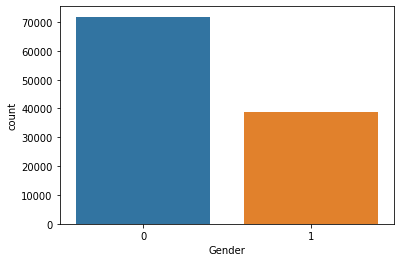

Gender


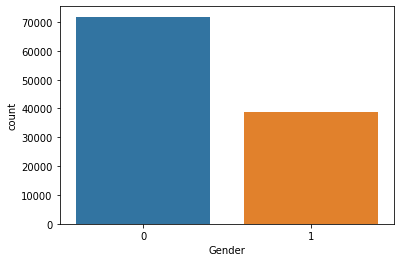

Age
Age


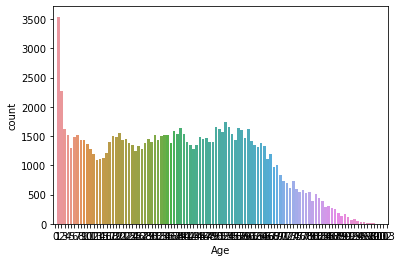

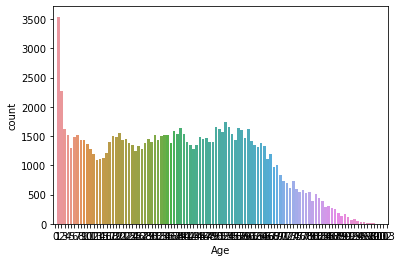

Neighbourhood
Neighbourhood


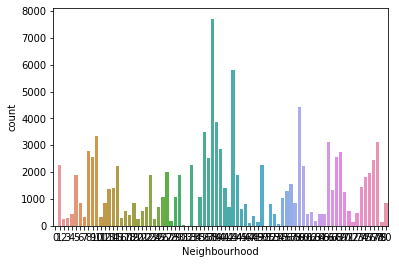

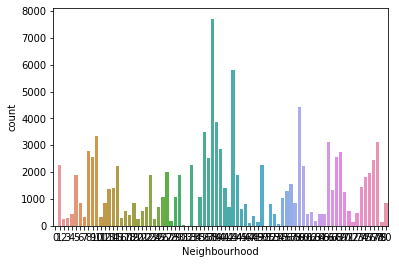

Scholarship
Scholarship


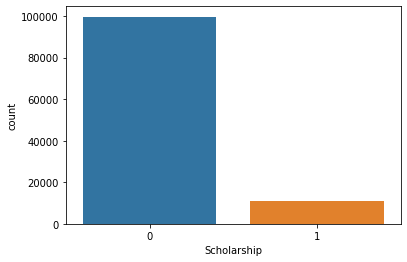

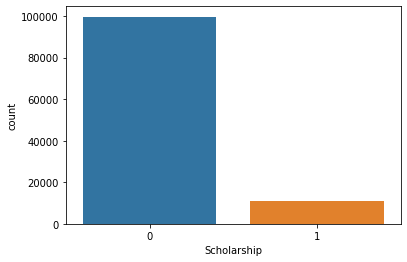

Hipertension
Hipertension


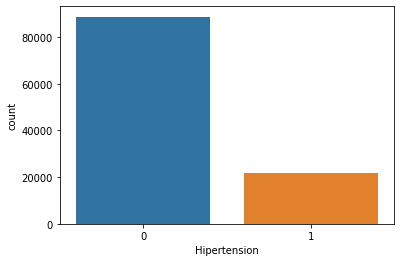

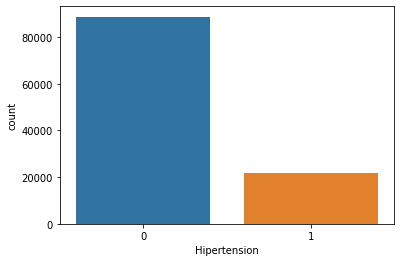

Diabetes
Diabetes


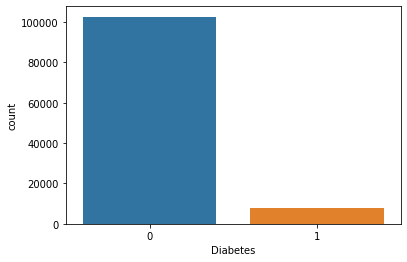

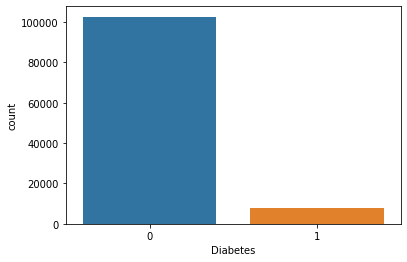

Alcoholism
Alcoholism


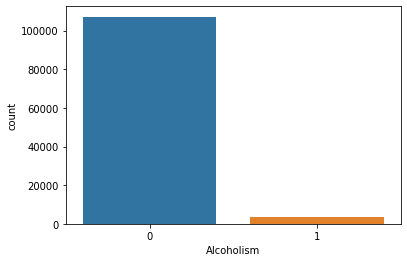

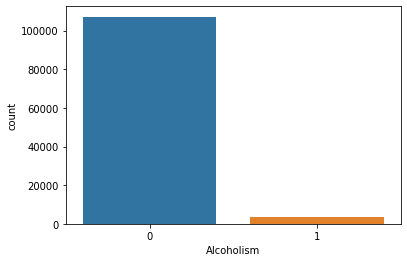

Handcap
Handcap


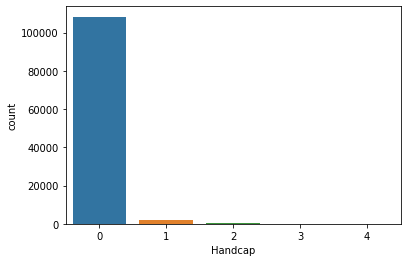

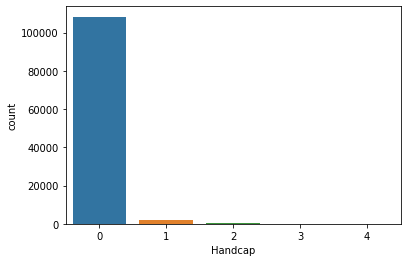

SMS_received
SMS_received


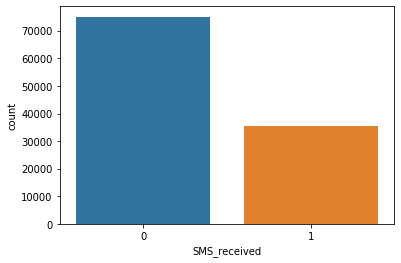

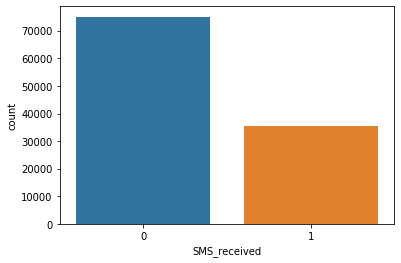

No-show
No-show


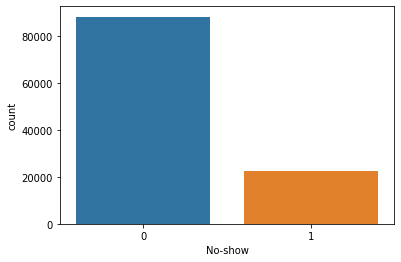

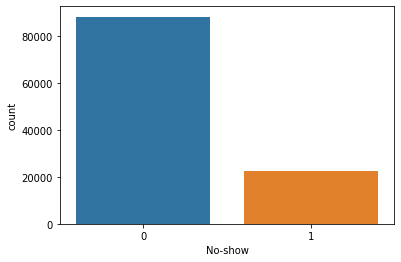

In [29]:
for features in train_df.columns.values:
    print(features)
    g = sns.countplot(x= features, data=train_df)
    plt.show()


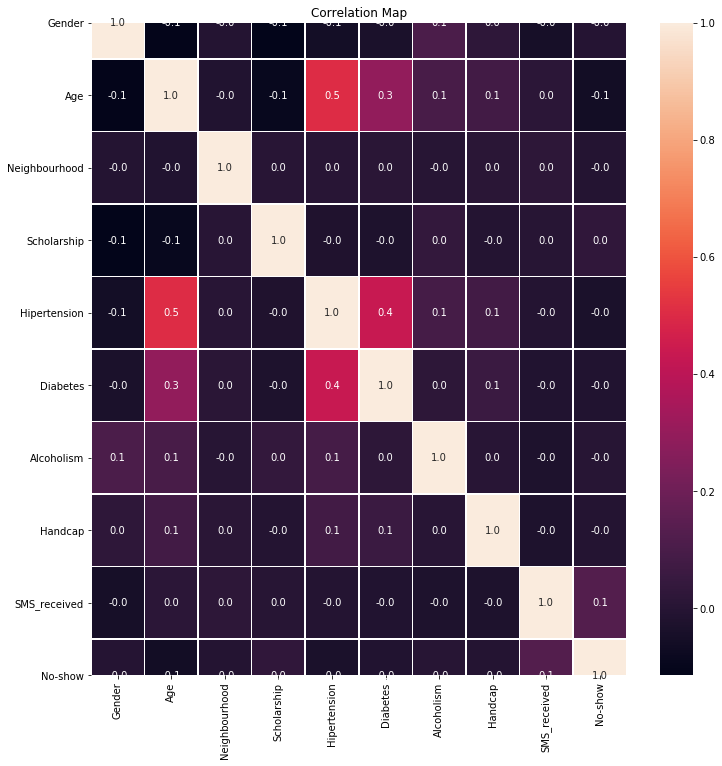

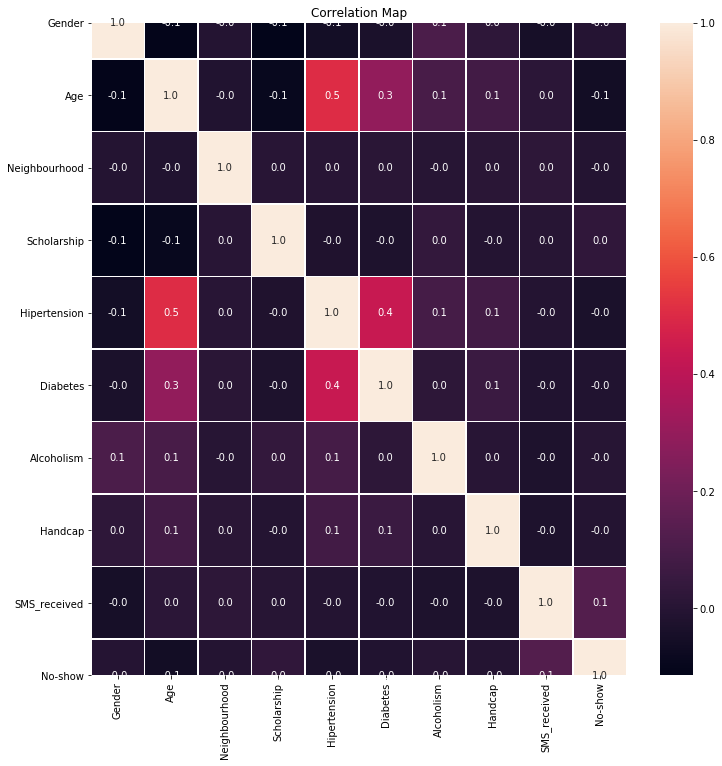

In [31]:
f,ax=plt.subplots(figsize = (12, 12))
sns.heatmap(train_df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()